In [1]:
import math
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import collections as col
import re
import random
import sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import LinearSVC
from sklearn import linear_model


In [2]:
def load_data(train='Yes', test='No', validation='No'):
	"""Loads and returns datasets as required
	   Return empty lst for if 'No'
	"""
	if train=='Yes':
		df_train = pd.read_csv('dataset/train.csv', sep=',')
	else:
		df_train = []

	if test=='Yes':
		df_test = pd.read_csv('dataset/test.csv', sep=',')
	else:
		df_test = []

	if validation=='Yes':
		df_validation = pd.read_csv('dataset/validation.csv', sep=',')
	else:
		df_validation = []
	
	print('Data loaded', len(df_train), len(df_test), len(df_validation))
	return df_train, df_test, df_validation

def label_encode_train(df_train):
    pass

def label_decode_test(df_test, le_dict):
    pass

In [3]:
df_train, df_test, df_validation= load_data('Yes', 'No', 'Yes')

Data loaded 2697738 0 299749


In [4]:
print('Budget', 25000000)
print('Val sum bidprice', sum(df_validation['bidprice'].values))
print('Val sum payprice', sum(df_validation['payprice'].values)) #price we use

Budget 25000000
Val sum bidprice 81655340
Val sum payprice 24045218


In [5]:
# Feature engineering
def label_encoder(df_column_nint, column_le= None): 
    if column_le== None:
        column_le = LabelEncoder()
        column_le.fit(df_column_nint.unique())
    if column_le!= None:
        pass
    df_column_int = column_le.transform(df_column_nint)
    return pd.DataFrame(df_column_int), column_le

df_int = pd.DataFrame()
df_int = df_train

# Y - Target
array_y = df_int[['click']].as_matrix()
array_y_r = np.reshape(array_y, (-1))

# X - Features
lst_int_features = ['weekday', 'hour', 'slotwidth', 'slotheight', 'advertiser', 'city'] 
lst_nint_features = ['adexchange', 'slotformat', 'slotvisibility', 'useragent']
lst_nint_le_features = ['le_adexchange', 'le_slotformat', 'le_slotvisibility', 'le_useragent']

le_adexchange, le_a1 = label_encoder(df_int['adexchange'])
le_slotformat, le_s2 = label_encoder(df_int['slotformat'])
le_slotvisibility, le_s3 = label_encoder(df_int['slotvisibility'])
le_useragent, le_u4 = label_encoder(df_int['useragent'])

df_int['le_adexchange']= le_adexchange
df_int['le_slotformat']= le_slotformat
df_int['le_slotvisibility']= le_slotvisibility
df_int['le_useragent']= le_useragent

lst_x_1 = ['advertiser']
lst_x_2 = lst_int_features
lst_x_3 = [lst_int_features[0], lst_int_features[1], lst_nint_le_features[0]]
lst_x_all = lst_int_features+ lst_nint_le_features

array_x_1 = df_int[lst_x_1].as_matrix()
array_x_2 = df_int[lst_x_2].as_matrix()
array_x_3 = df_int[lst_x_3].as_matrix()
array_x_all = df_int[lst_x_all].as_matrix()

In [6]:
df_int.columns

Index(['click', 'weekday', 'hour', 'bidid', 'logtype', 'userid', 'useragent',
       'IP', 'region', 'city', 'adexchange', 'domain', 'url', 'urlid',
       'slotid', 'slotwidth', 'slotheight', 'slotvisibility', 'slotformat',
       'slotprice', 'creative', 'bidprice', 'payprice', 'keypage',
       'advertiser', 'usertag', 'le_adexchange', 'le_slotformat',
       'le_slotvisibility', 'le_useragent'],
      dtype='object')

In [7]:
# Build model
def Naive_Bayes(array_x, array_y):
    NB_model = GaussianNB()
    NB_model.fit(array_x, array_y)
    return NB_model

def Logistic_Regression(array_x, array_y):
    LR_model = linear_model.LogisticRegression(penalty='l2')
    LR_model.fit(array_x, array_y)
    return LR_model

def Logistic_Regression_Cu(array_x, array_y):
    LR_model = linear_model.LogisticRegression(penalty='l2', class_weight='balanced')
    LR_model.fit(array_x, array_y)
    return LR_model_Cu

# Build with on 'advertiser' from validation set
#NB_model_1 = Naive_Bayes(array_x_1, array_y_r)
#NB_model_2 = Naive_Bayes(array_x_2, array_y_r)
#NB_model_3 = Naive_Bayes(array_x_3, array_y_r)
NB_model_all = Naive_Bayes(array_x_all, array_y_r)

#LR_model_1 = Logistic_Regression(array_x_1, array_y_r)
#LR_model_2 = Logistic_Regression(array_x_2, array_y_r)
#LR_model_3 = Logistic_Regression(array_x_3, array_y_r)
#LR_model_all = Logistic_Regression(array_x_all, array_y_r)

In [ ]:
Linear_SVM_model = LinearSVC()
Linear_SVM_model.fit(array_x_3, array_y_r)

In [ ]:
Linear_SVM_model

In [8]:
le_adexchange, _ = label_encoder(df_validation['adexchange'], le_a1)
le_slotformat, _ = label_encoder(df_validation['slotformat'], le_s2)
le_slotvisibility, _ = label_encoder(df_validation['slotvisibility'], le_s3)
le_useragent, _ = label_encoder(df_validation['useragent'], le_u4)

df_validation['le_adexchange']= le_adexchange
df_validation['le_slotformat']= le_slotformat
df_validation['le_slotvisibility']= le_slotvisibility
df_validation['le_useragent']= le_useragent

In [ ]:
# Infer model
#NB_model_1pCTR_v = NB_model_1.predict_proba(df_validation[lst_x_1].as_matrix())[:, 1]
#NB_model_2pCTR_v = NB_model_2.predict_proba(df_validation[lst_x_2].as_matrix())[:, 1]
#NB_model_3pCTR_v = NB_model_3.predict_proba(df_validation[lst_x_3].as_matrix())[:, 1]
NB_model_allpCTR_v = NB_model_all.predict_proba(df_validation[lst_x_all].as_matrix())[:, 1]

#LR_model_1pCTR_v = LR_model_1.predict_proba(df_validation[lst_x_1].as_matrix())[:, 1]
#LR_model_2pCTR_v = LR_model_2.predict_proba(df_validation[lst_x_2].as_matrix())[:, 1]
#LR_model_3pCTR_v = LR_model_3.predict_proba(df_validation[lst_x_3].as_matrix())[:, 1]
#LR_model_allpCTR_v = LR_model_all.predict_proba(df_validation[lst_x_all].as_matrix())[:, 1]

In [10]:
# Evaluate model - CE
def evaluate_model1(df_val, array_pCTR):
    return -1/len(df_val) *sum((1- df_val['click'])* np.log(np.clip(array_pCTR, 1e-15 , 1)) +\
    (df_val['click'])* np.log(np.clip((1- array_pCTR), 1e-15 , 1)))

def evaluate_model2(df_val, array_pCTR):
    return -1/len(df_val) *sum((1- df_val['click'])* np.log(np.clip(array_pCTR, 1e-15 , 1)))

def evaluate_model3(df_val, array_pCTR):
    return -1/len(df_val) *sum(df_val['click']* np.log(np.clip((1- array_pCTR), 1e-15 , 1)))

print('NB')
print(evaluate_model1(df_validation, NB_model_1pCTR_v))
print(evaluate_model1(df_validation, NB_model_2pCTR_v))
print(evaluate_model1(df_validation, NB_model_3pCTR_v))
print(evaluate_model1(df_validation, NB_model_allpCTR_v))
print('LR')
print(evaluate_model1(df_validation, LR_model_1pCTR_v))
print(evaluate_model1(df_validation, LR_model_2pCTR_v))
print(evaluate_model1(df_validation, LR_model_3pCTR_v))
print(evaluate_model1(df_validation, LR_model_allpCTR_v))

NB
7.18484819496
7.20790028342
7.28965719827
7.98823257973
LR
7.14291151019
7.2301968942
7.21577370925
7.5022349516


In [67]:
#.score
array_y = df_validation[['click']].as_matrix()
array_y_r = np.reshape(array_y, (-1))

print('NB')
print(NB_model_1.score(df_validation[lst_x_1].as_matrix(), array_y_r))
print(NB_model_2.score(df_validation[lst_x_2].as_matrix(), array_y_r))
print(NB_model_3.score(df_validation[lst_x_3].as_matrix(), array_y_r))
print(NB_model_all.score(df_validation[lst_x_all].as_matrix(), array_y_r))
print('LR')
print(LR_model_1.score(df_validation[lst_x_1].as_matrix(), array_y_r))
print(LR_model_2.score(df_validation[lst_x_2].as_matrix(), array_y_r))
print(LR_model_3.score(df_validation[lst_x_3].as_matrix(), array_y_r))
print(LR_model_all.score(df_validation[lst_x_all].as_matrix(), array_y_r))

NB
0.99924603585
0.99924603585
0.99924603585
0.972640442504
LR
0.99924603585
0.99924603585
0.99924603585
0.99924603585


In [11]:
df_pCTRs= pd.DataFrame()
df_pCTRs= df_validation
df_pCTRs['NB_model_1pCTR_v']= NB_model_1pCTR_v
df_pCTRs['NB_model_2pCTR_v']= NB_model_2pCTR_v
df_pCTRs['NB_model_3pCTR_v']= NB_model_3pCTR_v
df_pCTRs['NB_model_allpCTR_v']= NB_model_allpCTR_v
df_pCTRs['LR_model_1pCTR_v']= LR_model_1pCTR_v
df_pCTRs['LR_model_2pCTR_v']= LR_model_2pCTR_v
df_pCTRs['LR_model_3pCTR_v']= LR_model_3pCTR_v
df_pCTRs['LR_model_allpCTR_v']= LR_model_allpCTR_v

In [12]:
df_temp1= df_pCTRs[['bidid', 'click', 'NB_model_1pCTR_v']].sort_values('NB_model_1pCTR_v', ascending=False)
df_temp2= df_pCTRs[['bidid', 'click', 'NB_model_2pCTR_v']].sort_values('NB_model_2pCTR_v', ascending=False)
df_temp3= df_pCTRs[['bidid', 'click', 'NB_model_3pCTR_v']].sort_values('NB_model_3pCTR_v', ascending=False)
df_temp4= df_pCTRs[['bidid', 'click', 'NB_model_allpCTR_v']].sort_values('NB_model_allpCTR_v', ascending=False)
df_temp5= df_pCTRs[['bidid', 'click', 'LR_model_1pCTR_v']].sort_values('LR_model_1pCTR_v', ascending=False)
df_temp6= df_pCTRs[['bidid', 'click', 'LR_model_2pCTR_v']].sort_values('LR_model_2pCTR_v', ascending=False)
df_temp7= df_pCTRs[['bidid', 'click', 'LR_model_3pCTR_v']].sort_values('LR_model_3pCTR_v', ascending=False)
df_temp8= df_pCTRs[['bidid', 'click', 'LR_model_allpCTR_v']].sort_values('LR_model_allpCTR_v', ascending=False)

def count_clicks_order(df_pCTRs):
    counter= 0
    dic= {}
    for i in range(len(df_pCTRs)):
        if df_pCTRs[i:(i+1)]['click'].values== 1:
            counter+= 1
            dic[counter]= i
            if counter== 226:
                break
    return dic, counter

dic1= count_clicks_order(df_temp1)
dic2= count_clicks_order(df_temp2)
dic3= count_clicks_order(df_temp3)
dic4= count_clicks_order(df_temp4)
dic5= count_clicks_order(df_temp5)
dic6= count_clicks_order(df_temp6)
dic7= count_clicks_order(df_temp7)
dic8= count_clicks_order(df_temp8)

In [37]:
x = []
y = []
for i, j in dic1[0].items():
    x.append(i)
    y.append(j)
x1 = []
y1 = []
for i, j in dic2[0].items():
    x1.append(i)
    y1.append(j)
x2 = []
y2 = []
for i, j in dic3[0].items():
    x2.append(i)
    y2.append(j) 
x3 = []
y3 = []
for i, j in dic4[0].items():
    x3.append(i)
    y3.append(j) 
x4 = []
y4 = []
for i, j in dic5[0].items():
    x4.append(i)
    y4.append(j) 
x6 = []
y6 = []
for i, j in dic7[0].items():
    x6.append(i)
    y6.append(j) 
x7 = []
y7 = []
for i, j in dic8[0].items():
    x7.append(i)
    y7.append(j) 

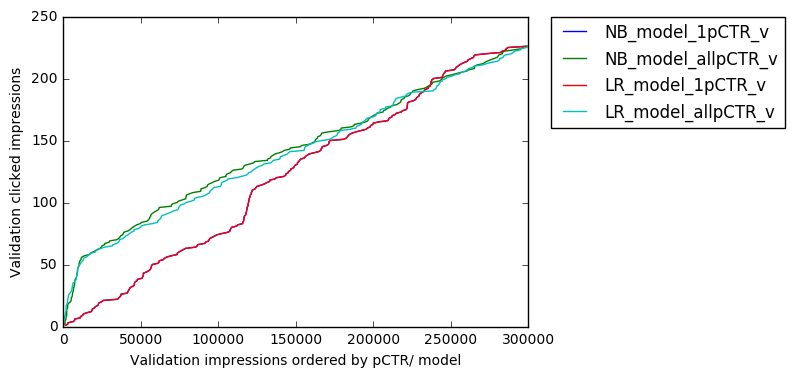

In [40]:
plt.plot(y, x, label="NB_model_1pCTR_v")
#plt.plot(y2, x2, label="NB_model_3pCTR_v") 
plt.plot(y3, x3, label="NB_model_allpCTR_v")

plt.plot(y4, x4, label="LR_model_1pCTR_v")
#plt.plot(y6, x6, label="LR_model_3pCTR_v")
plt.plot(y7, x7, label="LR_model_allpCTR_v")

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Validation impressions ordered by pCTR/ model')
plt.ylabel('Validation clicked impressions')
plt.show()